# https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import pandas as pd
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,auc,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import xgboost as xgb
%matplotlib inline

In [2]:
dataset = pd.read_csv ('diabetes.csv')
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#The target is the outcome column
#The input data is the rest of the columns except outcome
X = dataset.drop('Outcome', axis=1).values   #Input
y = dataset['Outcome'].values                #Target

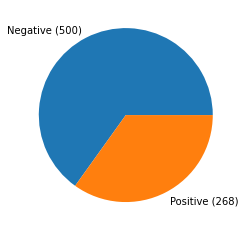

In [7]:
y_value_counts = dataset['Outcome'].value_counts()
mylabels = ["Negative (" + str(y_value_counts[0]) + ")", "Positive (" + str(y_value_counts[1]) + ")"]
plt.pie(y_value_counts.to_numpy(),labels = mylabels)
plt.show() 

### Imbalanced data set As Positive class are less than Negative class
### Negative Class (500 patients data)
### Positive Class (268 patients data)

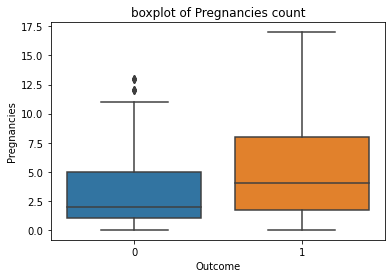

In [8]:
ax = sns.boxplot(x="Outcome", y="Pregnancies", data=dataset)
plt.title("boxplot of Pregnancies count")
plt.show()


#### Higher the number of pregnacies more is the tendency to be diabetic
#### 50% Negative diabetic patients have less than 2 Pregnancies


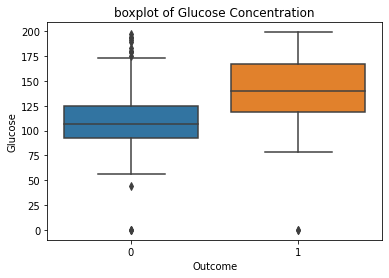

In [9]:
ax = sns.boxplot(x="Outcome", y="Glucose", data=dataset)
plt.title("boxplot of Glucose Concentration")
plt.show()

### Glucose concentration is best parameter to distinguish positive and negative patients

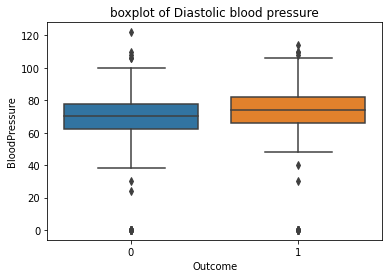

In [10]:
ax = sns.boxplot(x="Outcome", y="BloodPressure", data=dataset)
plt.title("boxplot of Diastolic blood pressure")
plt.show()

#### Diastolic blood pressure percentiles are similar for both positive and negative patients.

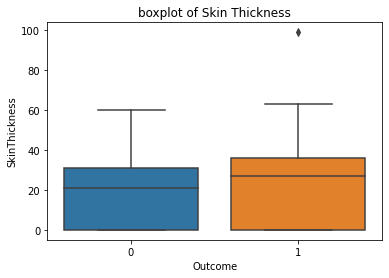

In [11]:
ax = sns.boxplot(x="Outcome", y="SkinThickness", data=dataset)
plt.title("boxplot of Skin Thickness")
plt.show()

### Skin thickness percentiles are similar with small margin change in 50th and 75th percentile

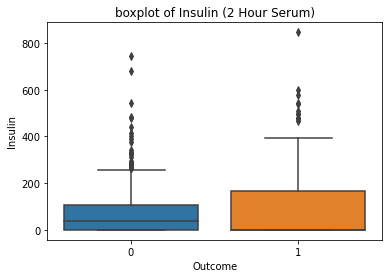

In [12]:
ax = sns.boxplot(x="Outcome", y="Insulin", data=dataset)
plt.title("boxplot of Insulin (2 Hour Serum)")
plt.show()

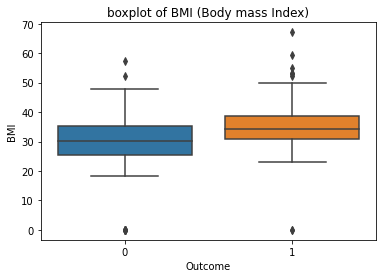

In [13]:
ax = sns.boxplot(x="Outcome", y="BMI", data=dataset)
plt.title("boxplot of BMI (Body mass Index)")
plt.show()

### Higher the BMI higher the chance of Positive diabetic.

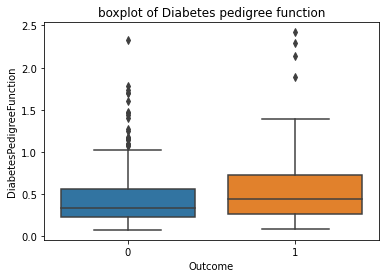

In [14]:
ax = sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=dataset)
plt.title("boxplot of Diabetes pedigree function")
plt.show()

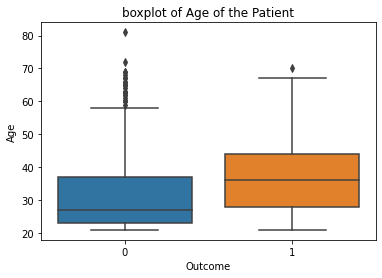

In [15]:
ax = sns.boxplot(x="Outcome", y="Age", data=dataset)
plt.title("boxplot of Age of the Patient")
plt.show()

### 75% patients having negative diabetic are less than 38 years

In [16]:
#https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
duplicate = dataset[dataset.duplicated()]
if duplicate.empty:
    print("There are no duplicate entries in dataset.");
else: 
    print("There are Duplicate entries in dataset.")

There are no duplicate entries in dataset.


In [17]:
sl_std_scaler = StandardScaler()
X = sl_std_scaler.fit_transform(X)

In [18]:
#Split train, CV and test data and print the no of values in each set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.33,stratify= y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train,y_train,test_size=0.33,stratify=y_train)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)
print(X_cv.shape,y_cv.shape)

(344, 8) (344,)
(254, 8) (254,)
(170, 8) (170,)


In [19]:
def draw_error_plot_hyperparameter(model_name,hyperparameter,train_auc,cv_auc):
    plt.plot(hyperparameter, train_auc, label='Train AUC')
    plt.plot(hyperparameter, cv_auc, label='CV AUC')

    plt.scatter(hyperparameter, train_auc, label='Train AUC points')
    plt.scatter(hyperparameter, cv_auc, label='CV AUC points')

    plt.legend()
    plt.xlabel(model_name + "Hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS to get Best hyperparameter")
    plt.grid()
    plt.show()

In [20]:
def draw_AUC_plot(model_clf,train_x,test_x,train_y,test_y):
    y_train_pred = batch_predict(model_clf, train_x)    
    y_test_pred = batch_predict(model_clf, test_x)

    train_fpr, train_tpr, tr_thresholds = roc_curve(train_y, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(test_y, y_test_pred)

    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Train and test ROC Curve")
    plt.grid()
    plt.show()
    return y_test_pred;

In [21]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    return clf.predict_proba(data)[:,1]

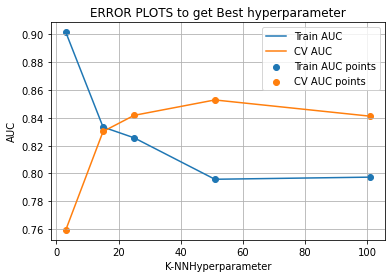

In [22]:
train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101]
for i in range(len(K)):
    clf_knn = KNeighborsClassifier(n_neighbors=K[i], n_jobs=-1)
    clf_knn.fit(X_train, y_train)

    y_train_pred = batch_predict(clf_knn, X_train)    
    y_cv_pred = batch_predict(clf_knn, X_cv)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
draw_error_plot_hyperparameter("K-NN",K,train_auc,cv_auc)

In [23]:
best_k_neighbor = 25;

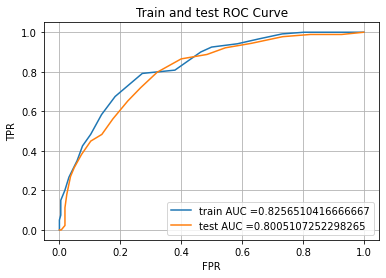

0.8005107252298265
[[148  17]
 [ 49  40]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       165
           1       0.70      0.45      0.55        89

    accuracy                           0.74       254
   macro avg       0.73      0.67      0.68       254
weighted avg       0.73      0.74      0.72       254



In [24]:
clf_knn = KNeighborsClassifier(n_neighbors=best_k_neighbor, n_jobs=-1)
clf_knn.fit(X_train, y_train)


y_test_proba_pred = draw_AUC_plot(clf_knn,X_train,X_test,y_train,y_test)
print(roc_auc_score(y_test, y_test_proba_pred))

y_test_pred = clf_knn.predict(X_test)
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

In [25]:
train_auc = []
cv_auc = []
depth = [1,5,10,20,35,50]
for i in range(len(depth)):
    clf_dt = DecisionTreeClassifier(max_depth=depth[i])
    clf_dt.fit(X_train,y_train)
    y_train_pred = batch_predict(clf_dt, X_train)    
    y_cv_pred = batch_predict(clf_dt, X_cv)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

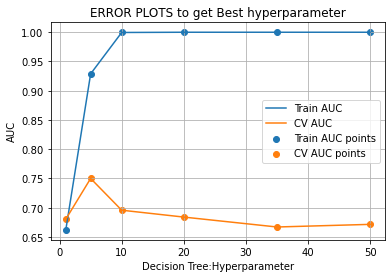

In [26]:
draw_error_plot_hyperparameter("Decision Tree:",depth,train_auc,cv_auc)

In [27]:
best_depth = 5

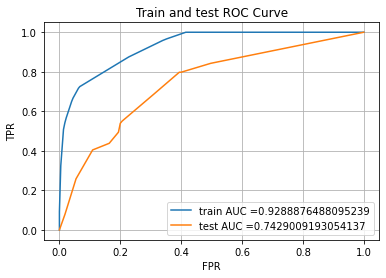

0.7429009193054137
[[132  33]
 [ 41  48]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       165
           1       0.59      0.54      0.56        89

    accuracy                           0.71       254
   macro avg       0.68      0.67      0.67       254
weighted avg       0.70      0.71      0.71       254



In [28]:
clf_dt =DecisionTreeClassifier(max_depth=best_depth)
clf_dt.fit(X_train, y_train)

y_test_proba_pred = draw_AUC_plot(clf_dt,X_train,X_test,y_train,y_test)
print(roc_auc_score(y_test, y_test_proba_pred))

y_test_pred = clf_dt.predict(X_test)
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

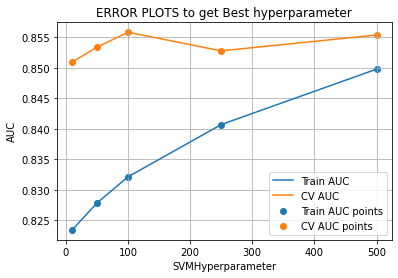

In [29]:
train_auc = []
cv_auc = []
C = [10,50,100,250,500]
for i in range(len(C)):
    clf_svm = SVC(C=C[i], gamma=0.001,probability=True)
    clf_svm.fit(X_train, y_train)

    y_train_pred = batch_predict(clf_svm, X_train)    
    y_cv_pred = batch_predict(clf_svm, X_cv)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
draw_error_plot_hyperparameter("SVM",C,train_auc,cv_auc)

In [30]:
best_C = 100

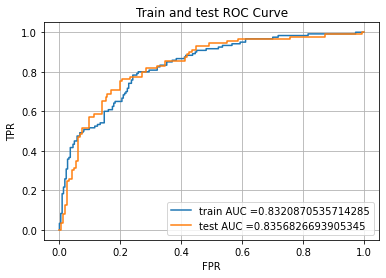

0.8356826693905345
[[132  33]
 [ 41  48]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       165
           1       0.59      0.54      0.56        89

    accuracy                           0.71       254
   macro avg       0.68      0.67      0.67       254
weighted avg       0.70      0.71      0.71       254



In [31]:
clf_svm = SVC(C=best_C, gamma=0.001,probability=True)
clf_svm.fit(X_train, y_train)

y_test_proba_pred = draw_AUC_plot(clf_svm,X_train,X_test,y_train,y_test)
print(roc_auc_score(y_test, y_test_proba_pred))

y_test_pred = clf_dt.predict(X_test)
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

In [32]:
train_auc = []
cv_auc = []
alpha=[1,10,25,50,100,250,500]
for i in range(len(alpha)):
    clf_rf = RandomForestClassifier(n_estimators=alpha[i],max_depth = best_depth,random_state=42,n_jobs=-1)
    clf_rf.fit(X_train,y_train)
    y_train_pred = batch_predict(clf_rf, X_train)    
    y_cv_pred = batch_predict(clf_rf, X_cv)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

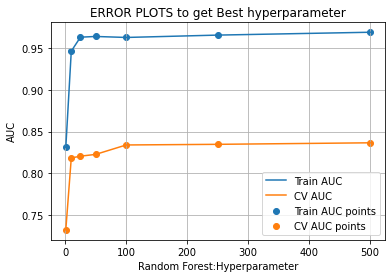

In [33]:
draw_error_plot_hyperparameter("Random Forest:",alpha,train_auc,cv_auc)

In [34]:
best_alpha = 250

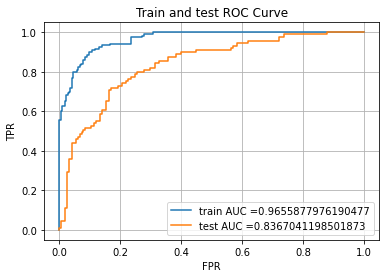

0.8367041198501873
[[143  22]
 [ 39  50]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.82       165
           1       0.69      0.56      0.62        89

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



In [35]:
clf_rf = RandomForestClassifier(n_estimators=best_alpha,max_depth = best_depth,random_state=42,n_jobs=-1)
clf_rf.fit(X_train, y_train)

y_test_proba_pred = draw_AUC_plot(clf_rf,X_train,X_test,y_train,y_test)
print(roc_auc_score(y_test, y_test_proba_pred))

y_test_pred = clf_rf.predict(X_test)
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

In [36]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] 
n_estimators = [5, 10, 50 ,100,300 ,500]

df_train = []
df_cv = []
for i in range(len(learning_rate)):
    train_auc = []
    cv_auc = []
    for j in range(len(n_estimators)):
        #Apply GBDT on Set-1 data with the hyperparmeters
        clf_gbdt = xgb.XGBClassifier(learning_rate=learning_rate[i],n_estimators=n_estimators[j],booster='gbtree',n_jobs = -1)
        clf_gbdt.fit(X_train, y_train);
        #calculate probability estimates of the positive class
        y_train_pred = batch_predict(clf_gbdt, X_train)    
        y_cv_pred = batch_predict(clf_gbdt, X_cv)    
        # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
        # not the predicted outputs        
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    df_train.append(train_auc);
    df_cv.append(cv_auc);

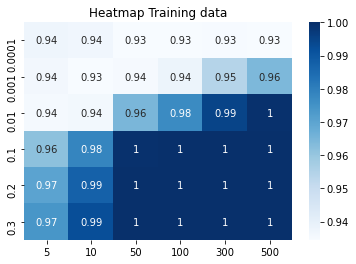

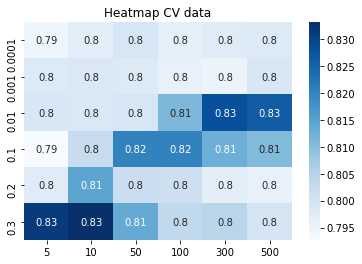

In [37]:
df_train = pd.DataFrame(df_train,columns=n_estimators,index=learning_rate)
df_cv = pd.DataFrame(df_cv,columns=n_estimators,index=learning_rate)
sns.heatmap(df_train, annot=True,cmap='Blues')
plt.title("Heatmap Training data")
plt.show()
sns.heatmap(df_cv, annot=True,cmap='Blues')
plt.title("Heatmap CV data")
plt.show()

In [38]:
best_learning_rate = 0.01;
best_n_estimator = 50;

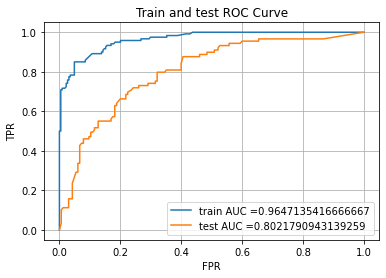

0.8021790943139259
[[135  30]
 [ 34  55]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       165
           1       0.65      0.62      0.63        89

    accuracy                           0.75       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.75      0.75      0.75       254



In [39]:
clf_gbdt = xgb.XGBClassifier(learning_rate=best_learning_rate,n_estimators=best_n_estimator,booster='gbtree',n_jobs = -1)
clf_gbdt.fit(X_train, y_train)

y_test_proba_pred = draw_AUC_plot(clf_gbdt,X_train,X_test,y_train,y_test)
print(roc_auc_score(y_test, y_test_proba_pred))

y_test_pred = clf_gbdt.predict(X_test)
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

In [40]:
#Split train, CV and test data and print the no of values in each set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.33,stratify= y)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(514, 8) (514,)
(254, 8) (254,)


{'n_neighbors': 23}
Best score is 0.7509613554159528


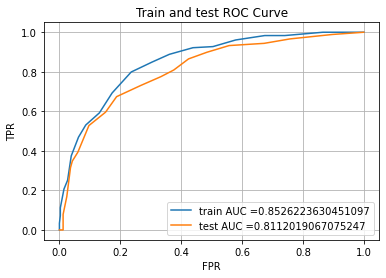

0.8112019067075247
[[144  21]
 [ 24  65]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       165
           1       0.76      0.73      0.74        89

    accuracy                           0.82       254
   macro avg       0.81      0.80      0.80       254
weighted avg       0.82      0.82      0.82       254



In [41]:
##GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)
print("Best score is {}".format(knn_cv.best_score_))

knn = KNeighborsClassifier(n_neighbors = knn_cv.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
y_test_proba_pred = draw_AUC_plot(knn,X_train,X_test,y_train,y_test)
print(roc_auc_score(y_test, y_test_proba_pred))

y_test_pred = clf_gbdt.predict(X_test)
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

{'max_depth': 2}
Best score is 0.7178564629735389


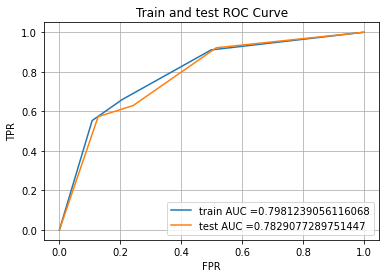

0.7829077289751447
[[144  21]
 [ 24  65]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       165
           1       0.76      0.73      0.74        89

    accuracy                           0.82       254
   macro avg       0.81      0.80      0.80       254
weighted avg       0.82      0.82      0.82       254



In [42]:
param_grid = {'max_depth': np.arange(1, 200)}
dt_clf = DecisionTreeClassifier()
dt_clf_cv = GridSearchCV(dt_clf, param_grid, cv=5)
dt_clf_cv.fit(X_train, y_train)
print(dt_clf_cv.best_params_)
print("Best score is {}".format(dt_clf_cv.best_score_))

dt_clf = DecisionTreeClassifier(max_depth = dt_clf_cv.best_params_['max_depth'])
dt_clf.fit(X_train, y_train)
y_test_proba_pred = draw_AUC_plot(dt_clf,X_train,X_test,y_train,y_test)
print(roc_auc_score(y_test, y_test_proba_pred))

y_test_pred = clf_gbdt.predict(X_test)
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

{'C': 81, 'gamma': 0.0001}
Best score is 0.7625737673710261


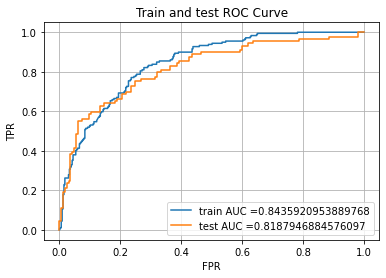

0.8187946884576097
[[149  16]
 [ 39  50]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       165
           1       0.76      0.56      0.65        89

    accuracy                           0.78       254
   macro avg       0.78      0.73      0.74       254
weighted avg       0.78      0.78      0.77       254



In [43]:
param_grid = {'C': np.arange(1, 500,10),'gamma':np.arange(0.0001,0.1),}
svm_clf = SVC(probability=True)
svm_clf_cv = GridSearchCV(svm_clf, param_grid, cv=5)
svm_clf_cv.fit(X_train, y_train)
print(svm_clf_cv.best_params_)
print("Best score is {}".format(svm_clf_cv.best_score_))

svm_clf = SVC(C = svm_clf_cv.best_params_['C'],gamma= svm_clf_cv.best_params_['gamma'],probability=True)
svm_clf.fit(X_train, y_train)
y_test_proba_pred = draw_AUC_plot(svm_clf,X_train,X_test,y_train,y_test)
print(roc_auc_score(y_test, y_test_proba_pred))

y_test_pred = svm_clf.predict(X_test)
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

{'max_depth': 4, 'n_estimators': 64}
Best score is 0.7625356938892062


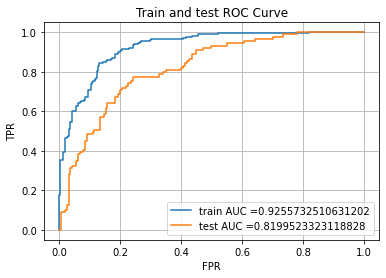

0.8199523323118828
[[140  25]
 [ 36  53]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       165
           1       0.68      0.60      0.63        89

    accuracy                           0.76       254
   macro avg       0.74      0.72      0.73       254
weighted avg       0.75      0.76      0.76       254



In [44]:
param_grid = {'n_estimators': [1, 8, 32, 64 ,100,200],'max_depth':[3,4,5,6]}
rf_clf = RandomForestClassifier(random_state=42,n_jobs=-1)
rf_clf_cv = GridSearchCV(rf_clf, param_grid, cv=5)
rf_clf_cv.fit(X_train, y_train)
print(rf_clf_cv.best_params_)
print("Best score is {}".format(rf_clf_cv.best_score_))

rf_clf = RandomForestClassifier(n_estimators = rf_clf_cv.best_params_['n_estimators'],max_depth= rf_clf_cv.best_params_['max_depth'],random_state=42,n_jobs=-1)
rf_clf.fit(X_train, y_train)
y_test_proba_pred = draw_AUC_plot(rf_clf,X_train,X_test,y_train,y_test)
print(roc_auc_score(y_test, y_test_proba_pred))

y_test_pred = rf_clf.predict(X_test)
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 64}
Best score is 0.7568246716162192


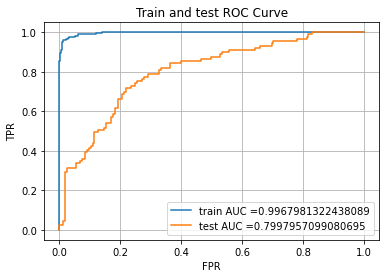

0.7997957099080695
[[132  33]
 [ 30  59]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       165
           1       0.64      0.66      0.65        89

    accuracy                           0.75       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.75      0.75      0.75       254



In [45]:
param_grid = {'n_estimators': [1, 8, 32, 64 ,100,200],'max_depth':[3,4,5,6],'learning_rate':[0.1,0.01,0.001]}
rf_clf = GradientBoostingClassifier(random_state=42)
rf_clf_cv = GridSearchCV(rf_clf, param_grid, cv=5)
rf_clf_cv.fit(X_train, y_train)
print(rf_clf_cv.best_params_)
print("Best score is {}".format(rf_clf_cv.best_score_))

rf_clf = GradientBoostingClassifier(n_estimators = rf_clf_cv.best_params_['n_estimators'],max_depth= rf_clf_cv.best_params_['max_depth'],learning_rate=rf_clf_cv.best_params_['learning_rate'],random_state=42)
rf_clf.fit(X_train, y_train)
y_test_proba_pred = draw_AUC_plot(rf_clf,X_train,X_test,y_train,y_test)
print(roc_auc_score(y_test, y_test_proba_pred))

y_test_pred = rf_clf.predict(X_test)
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# RanodmForest Classifier gives Test accuracy of 82%  
### f1 score is 82% for negative class and 63% for positive class this may be because of imbalance in dataset